In [19]:
import time
from datetime import timedelta
import matplotlib.pyplot as plt
#linear algebra
import numpy as np
#data processing
import pandas as pd
#data visualization
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_csv("bank-additional-full.csv")

In [21]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [24]:
#lấy ra 5 thuộc tính có số lượng giá trị rỗng nhiều nhất
total  = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending= False)
missing = pd.concat([total, percent_2], axis =1, keys = ['Total', '%'])
missing.head()

,Total,%
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0


không thấy có dữ liệu bị rỗng 

<AxesSubplot:title={'center':'Deposit value counts'}>

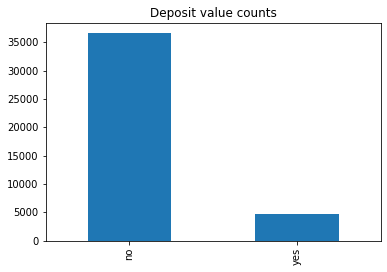

In [25]:
value_counts = df['y'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')

In [26]:
temp = value_counts/df['y'].count()
temp

no     0.887346
yes    0.112654
Name: y, dtype: float64

-Thống kê cho thấy có 88.7% khách hàng không đăng kí và 11.3% khách hàng đăng kí tiền gửi 
kì hạn

In [27]:
df1 = df.copy()

-xoá các thuộc tính unknown của bộ dữ liệu 

In [28]:
df1.drop('duration', axis = 1, inplace= True)
df1.drop("pdays", axis= 1, inplace = True)
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


- loại các thuộc tính duration và pdays bởi vì:
    thuộc tính duration đa số các cuộc gọi đều bằng 0 tại vì không liên hệ được 
    thuộc tính pdays đa số các khách hàng không được liên hệ 

In [29]:
for dataset in [df1]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[dataset['age'] <= 32, 'age' ] = 0
    dataset.loc[(dataset['age'] > 32)  & (dataset['age'] <= 38 ), 'age' ] = 1
    dataset.loc[(dataset['age'] > 38)  & (dataset['age'] <= 47 ), 'age' ] = 2
    dataset.loc[dataset['age'] > 47 , 'age' ] = 3
    

In [30]:
df1['age'].value_counts()

0    11176
2    10140
1     9999
3     9873
Name: age, dtype: int64

-chuyển đổi dữ liệu về kiểu int và chia các khách hàng thành 4 nhóm tuổi khách hàng 

In [31]:
#gộp các dòng dữ liệu basic.9y basic.6y basic.4y thành basic
df1['education'] = np.where(df1['education'] == 'basic.9y', 'basic', df1['education'])
df1['education'] = np.where(df1['education'] == 'basic.6y', 'basic', df1['education'])
df1['education'] = np.where(df1['education'] == 'basic.4y', 'basic', df1['education'])


In [32]:
df1['education'].unique()

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [33]:
#Chuyển các thuộc tính object sang label encoder

data = df1.copy()
accuracies = {}
times = {}
le = LabelEncoder()
for col in data.columns[[i == object for i in data.dtypes]]:
    data.loc[:, col] = le.fit_transform(data[col])
    print(le.classes_)

data.head(10)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single' 'unknown']
['basic' 'high.school' 'illiterate' 'professional.course'
 'university.degree' 'unknown']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['fri' 'mon' 'thu' 'tue' 'wed']
['failure' 'nonexistent' 'success']
['no' 'yes']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,3,7,1,1,1,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,1,0,2,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,2,0,1,0,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,1,0,0,2,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,2,7,1,0,1,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,3,0,1,3,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,2,1,1,5,1,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,0,9,2,3,0,2,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,0,7,2,1,0,2,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [34]:
df1['age'].value_counts()

0    11176
2    10140
1     9999
3     9873
Name: age, dtype: int64

0    11176
2    10140
1     9999
3     9873
Name: age, dtype: int64


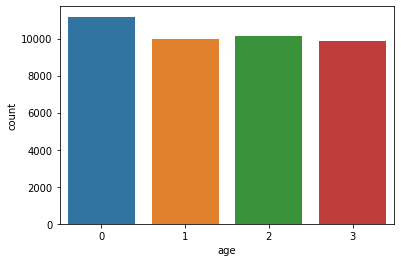

In [35]:
print(df1.age.value_counts())
ax= sns.countplot(data=df1, x='age')

-từ biểu đồ ta nhận xét được khách hàng từ độ tuổi dưới 32 thì nhiều nhất chiếm đến 9373
-và các số lượng khách hàng giảm dần theo độ tuổi

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64


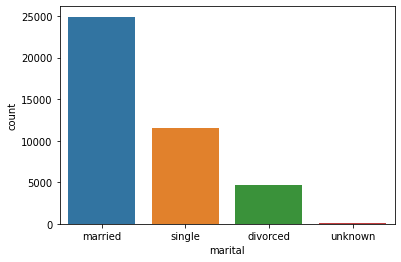

In [36]:
marital_value = df1.marital.value_counts()
marital_plot= sns.countplot(data=df1, x='marital')
print(marital_value)
print(marital_value/ df1.marital.count())

-từ biểu đồ ta nhận xét được khách hàng đa số là những người đã kết hôn chiếm đến 0.57% và độc thân chiếm 0.3% ...

<AxesSubplot:xlabel='marital', ylabel='y'>

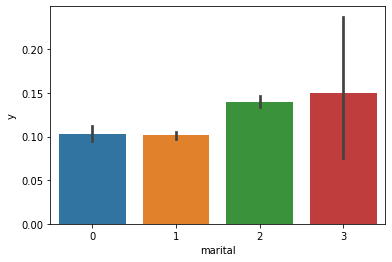

In [37]:
sns.barplot( x='marital',y='y', data=data )

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


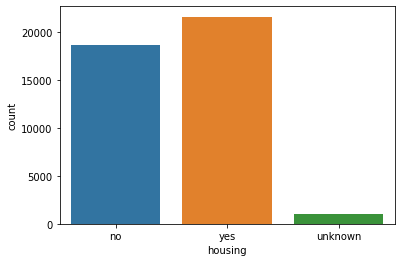

In [38]:
housing_value = df1.housing.value_counts()
print(housing_value)
housing_plot= sns.countplot(data=df1, x='housing')

<AxesSubplot:xlabel='education', ylabel='y'>

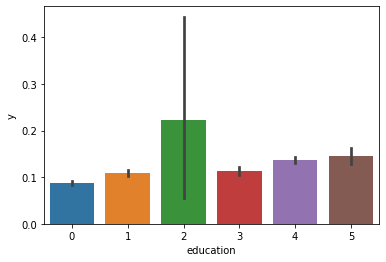

In [39]:
sns.barplot( x='education',y='y', data=data )

-nhìn vào đồ thị thấy được khách hàng có khoản vay nhà gần như bằng nhau 

0    33950
2     6248
1      990
Name: loan, dtype: int64


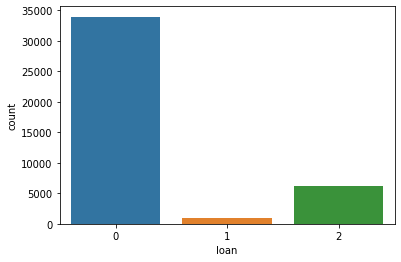

In [40]:
loan_value = data.loan.value_counts()
print(loan_value)
loan_plot= sns.countplot(data=data, x='loan')


<AxesSubplot:xlabel='loan', ylabel='y'>

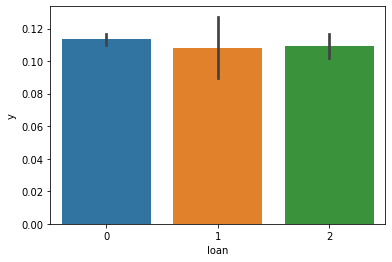

In [41]:
sns.barplot( x='loan',y='y', data=data )

-Thấy một yếu tố quan trọng nữa là khách hàng đa số có khoản nợ cá nhân

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


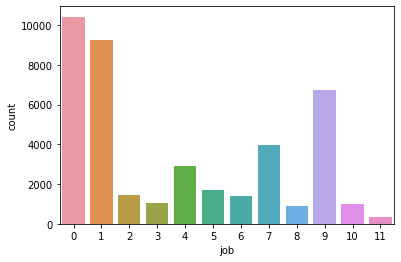

In [42]:
print(df1.job.value_counts())
ax= sns.countplot(data=data, x='job')

<AxesSubplot:xlabel='job', ylabel='y'>

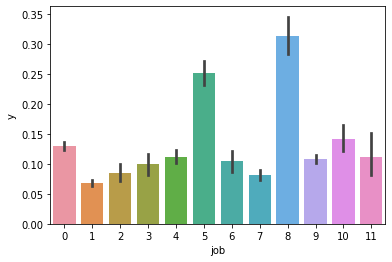

In [43]:
sns.barplot(x='job', y='y', data =data)

<AxesSubplot:>

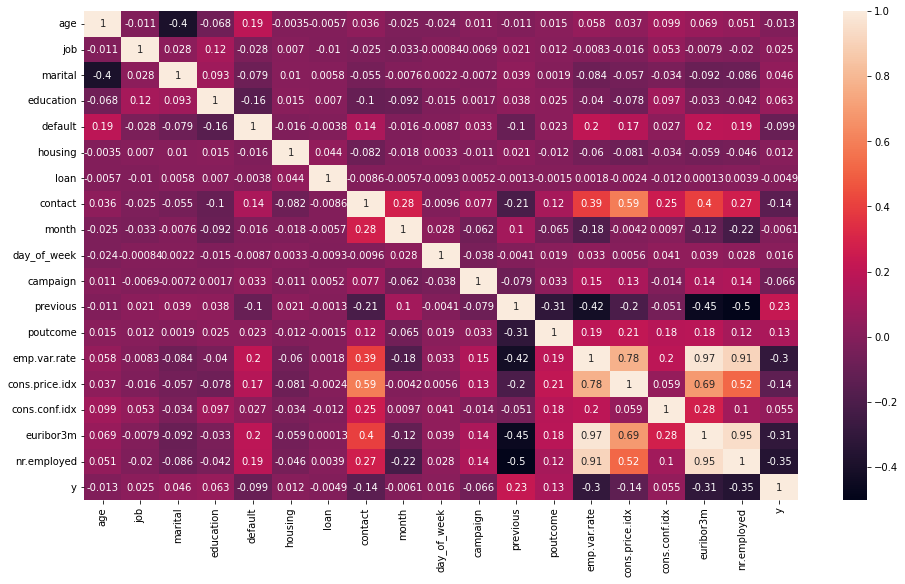

In [44]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot=True)

In [45]:
data.drop('emp.var.rate', axis = 1, inplace= True)
data.drop("cons.price.idx", axis= 1, inplace = True)
data.drop("euribor3m", axis= 1, inplace = True)
data.drop("nr.employed", axis= 1, inplace = True)

<AxesSubplot:>

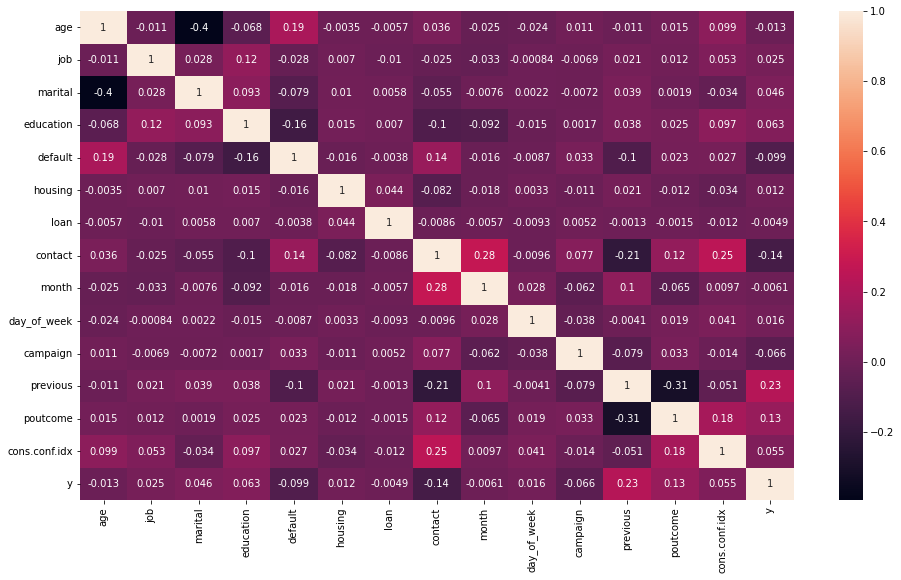

In [46]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot=True)

# -Thuật toán cây quyết định

In [47]:
x=data.drop('y', axis=1)
y=data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

-tachs dữ liệu thành 2 biến , 1 biến chứa thuộc tính bình thường, 1 biến chứa thuộc tính quyết định 
-chia tập dữ liệu thành 2 phần 70% huấn luyện , 30% kiểm thử

In [48]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
start_tr= time.time()
clf.fit(x_train, y_train)
tree_pred = clf.predict(x_test)
end_tr = time.time()
times['id3'] = timedelta(seconds= round(end_tr -start_tr, 4)).total_seconds()
print("time: ", times['id3'])

time:  0.1496


In [49]:
tree_score = metrics.accuracy_score(y_test, tree_pred)
accuracies['id3'] = tree_score
print("accuracy: ", tree_score)
print("report",metrics.classification_report(y_test, tree_pred))

accuracy:  0.8516630250060694
report               precision    recall  f1-score   support

           0       0.91      0.92      0.92     10968
           1       0.33      0.32      0.33      1389

    accuracy                           0.85     12357
   macro avg       0.62      0.62      0.62     12357
weighted avg       0.85      0.85      0.85     12357



In [50]:
# tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

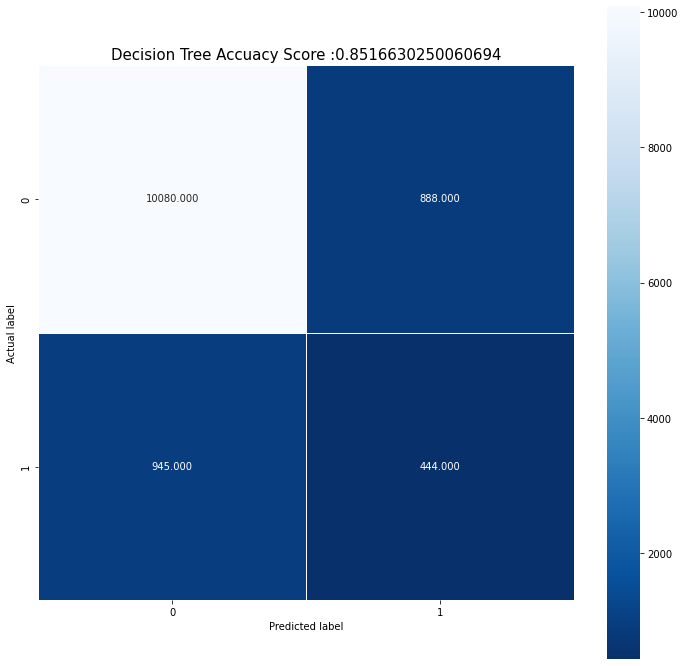

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot= True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuacy Score :{0}'.format(tree_score)
plt.title(title, size= 15);

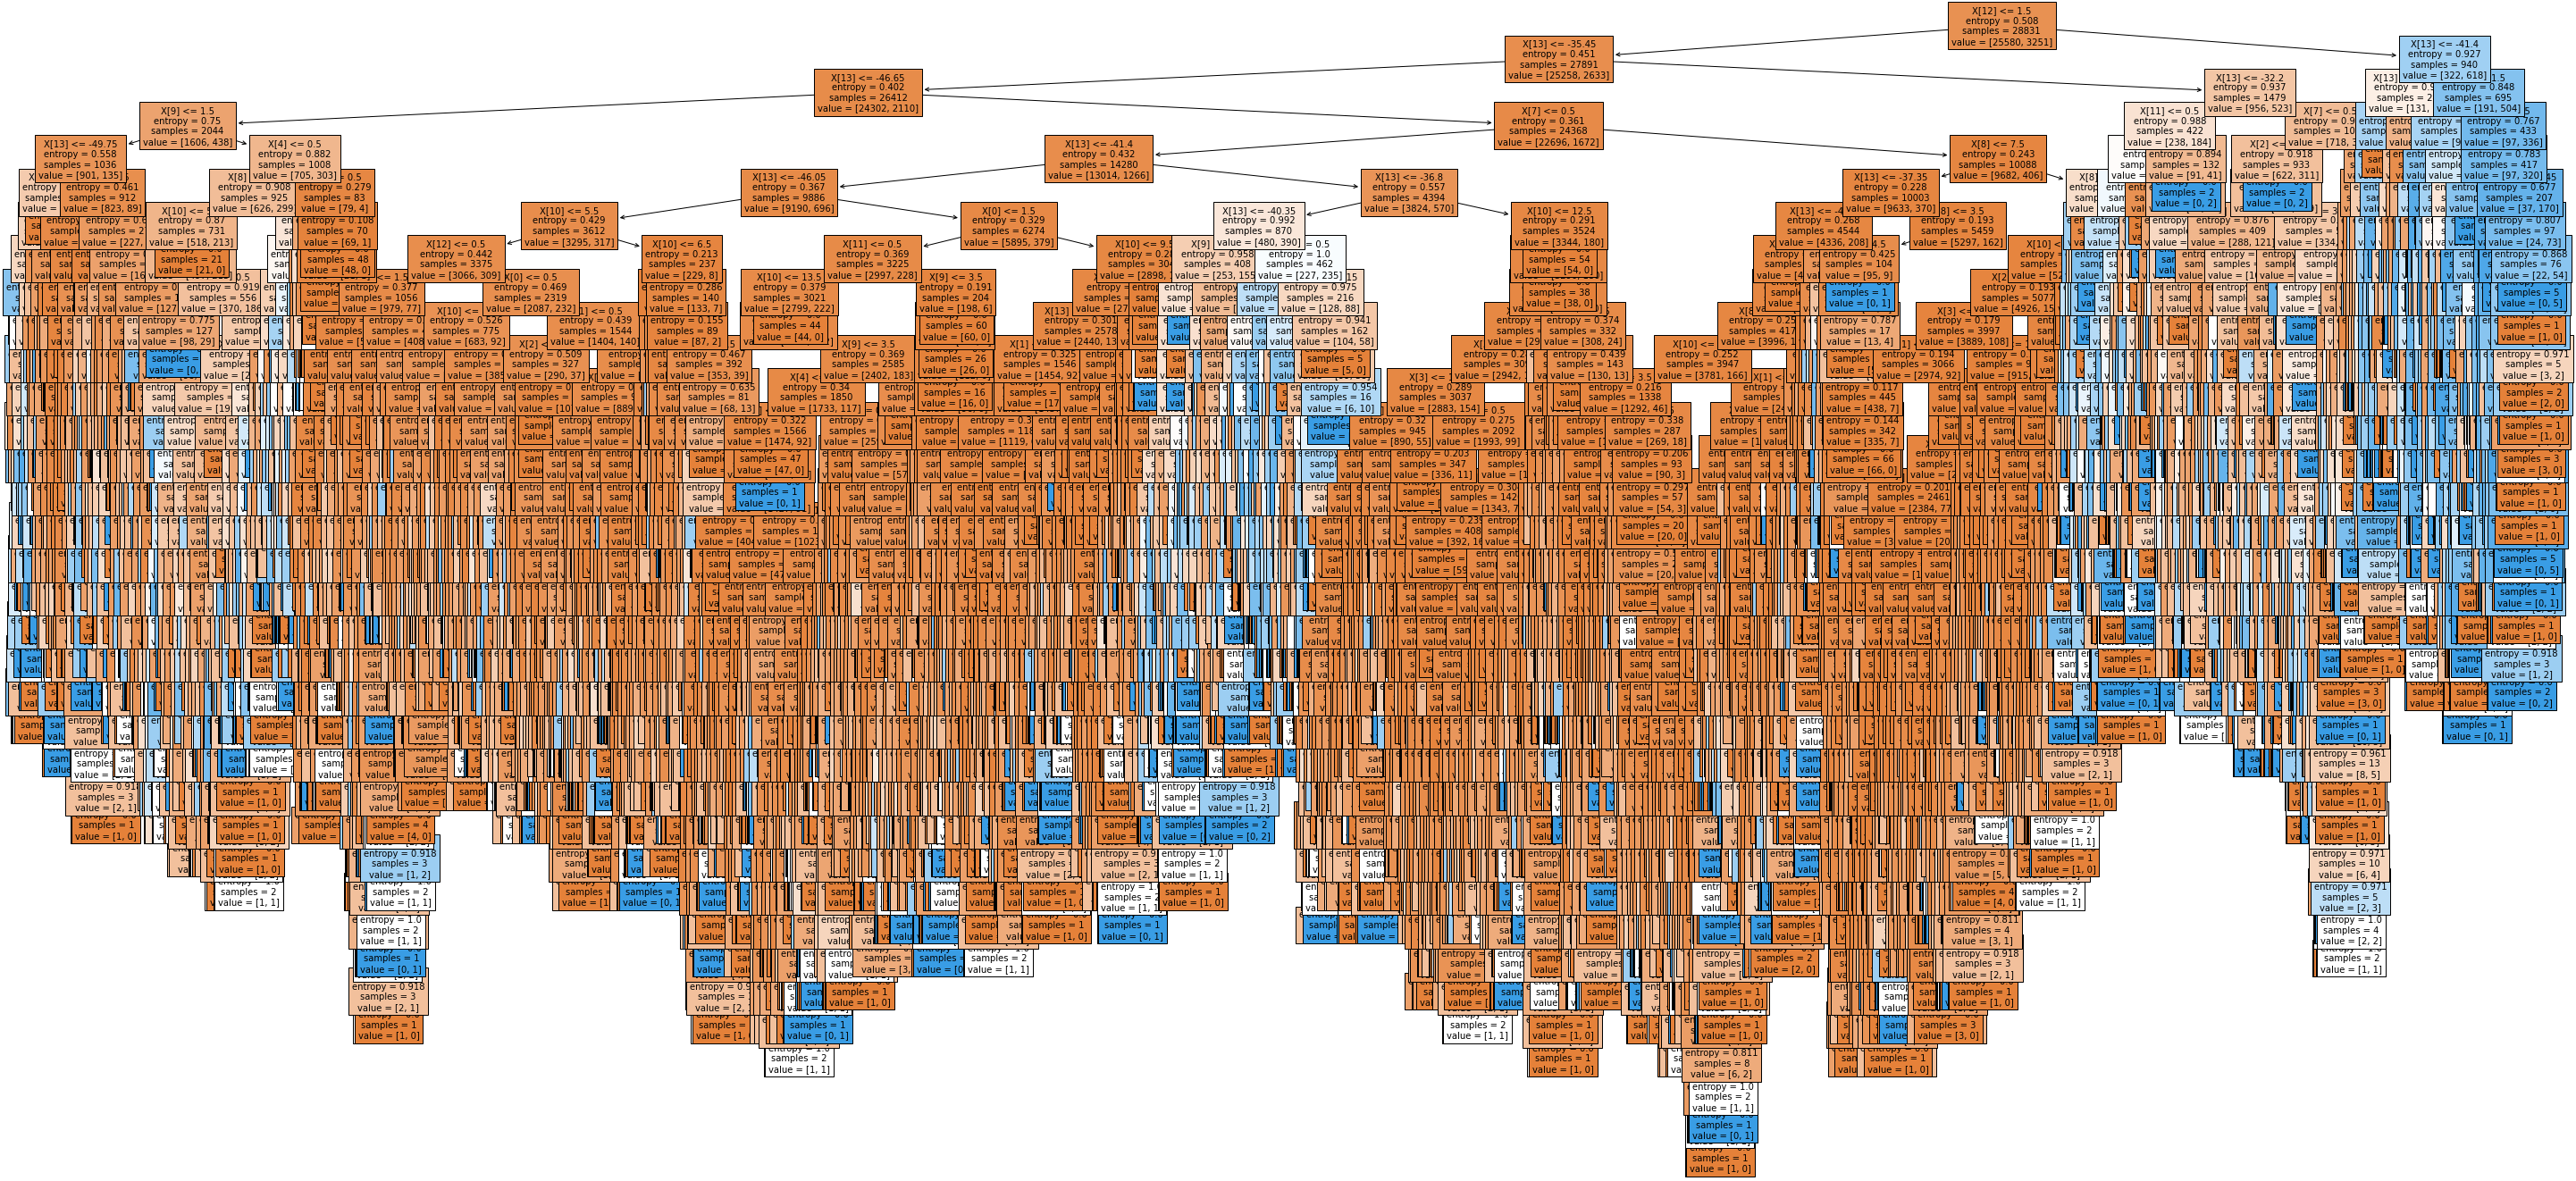

In [60]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled= True, fontsize = 10)
plt.show()

# -RAMDOM FOREST CLASSIFIER

	Random Forest sử dụng đồ thị có hướng để mô hình hóa việc ra quyết định; mỗi nút trên biểu đồ đại diện cho một câu hỏi về dữ liệu và các nhánh xuất phát từ mỗi nút đại diện cho các câu trả lời có thể có cho câu hỏi đó. Sau đó ở bước dự đoán, với một dữ liệu mới, ở mỗi cây quyết định sẽ đi từ trên xuống theo các node điều kiện để được các dự đoán, sau đó kết quả cuối cùng được tổng hợp từ kết quả của các cây quyết định.

-Xây dựng thuật toán Random Forest:
-Giả sử bộ dữ liệu có n dữ liệu (sample) và mỗi dữ liệu có d thuộc tính (feature).
-Các bước xây dựng mỗi cây quyết định:
-Lấy ngẫu nhiên n dữ liệu từ bộ dữ liệu với kĩ thuật Bootstrapping ( random sampling with replacement).
Khi sample được 1 dữ liệu thì không bỏ dữ liệu đấy ra mà vẫn giữ lại trong tập dữ liệu ban đầu,
rồi tiếp tục sample cho tới khi sample đủ n dữ liệu.
Khi dùng kĩ thuật này thì tập n dữ liệu mới có thể có những dữ liệu bị trùng nhau.
-Sau khi sample được n dữ liệu từ bước 1,
chọn ngẫu nhiên ở k thuộc tính (k < n)  Bộ dữ liệu mới gồm n dữ liệu và mỗi dữ liệu có k t huộc tính.
-Dùng thuật toán Decision Tree để xây dựng cây quyết định với bộ dữ liệu ở bước 2.
-Do quá trình xây dựng mỗi cây quyết định đều có yếu tố ngẫu nhiên (random) 
nên kết quả là các cây quyết định trong thuật toán Random Forest có thể khác nhau.
-Thuật toán Random Forest sẽ bao gồm nhiều cây quyết định, 
mỗi cây được xây dựng dùng thuật toán Decision Tree trên tập dữ liệu khác nhau và dùng tập thuộc tính khác nhau. 
Sau đó kết quả dự đoán của thuật toán Random Forest sẽ được tổng hợp từ các cây quyết định.


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier()

In [55]:
rf_pred = rfc.fit(x_train, y_train).predict(x_test)

In [56]:
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
rf_score = metrics.accuracy_score(y_test, rf_pred)
accuracies['RF'] = rf_score
print("Accuracy:" , rf_score)
print("Report", metrics.classification_report(y_test, rf_pred))

Accuracy: 0.8865420409484502
Report               precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.49      0.26      0.34      1389

    accuracy                           0.89     12357
   macro avg       0.70      0.61      0.64     12357
weighted avg       0.86      0.89      0.87     12357



In [58]:
# tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, rf_pred)

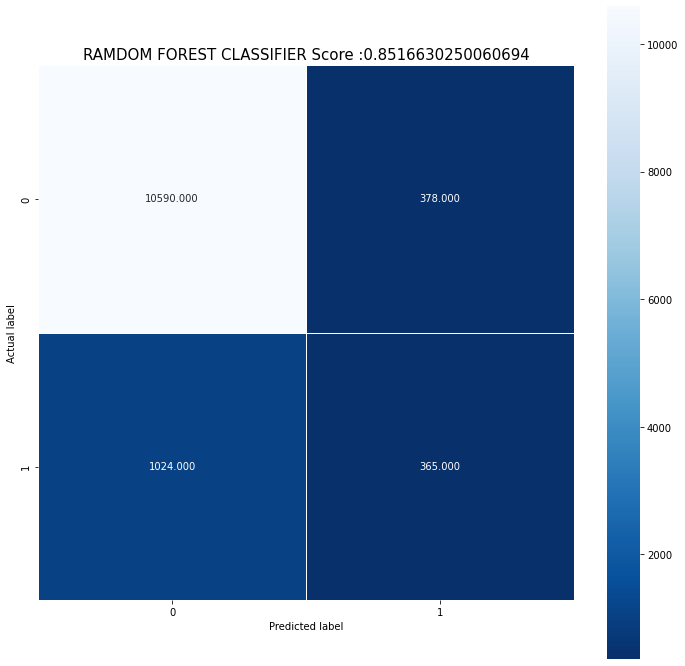

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot= True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'RAMDOM FOREST CLASSIFIER Score :{0}'.format(tree_score)
plt.title(title, size= 15);